# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [147]:
#Import dependencies
import json
import requests
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import time

from api_keys import weather_api_key


from citipy import citipy


#cities_path = "../output_data/cities.csv"
#study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
#cities_df = pd.read_csv(cities_path)
#study_results = pd.read_csv(study_results_path)


## Generate Cities List

In [148]:
#Create empty list of cities
city_list=[]


#generate random list of lattitude/longitude
lattitude = np.random.uniform(low=-90.000, high=90.000, size=1300)
longitude = np.random.uniform(low=-180.000, high=180.000, size=1300)
city_coord = zip(lattitude, longitude)


#pass lattitude/longitude through citipy to generate random list of world cities
for city_coord in city_coord:
    city=citipy.nearest_city(city_coord[0],city_coord[1]).city_name
    
    #add each new city to the list of cities
    if city not in city_list:
        city_list.append(city)

        
# verify the city list has at least 500 unique cities       
cities= pd.DataFrame(city_list)
cities.nunique()


0    561
dtype: int64

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [150]:
#Construct URL for API calls

url="http://api.openweathermap.org/data/2.5/weather?"
units="imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="


#Create empty lists to store API data
city_weather=[]
lat=[]
lon=[]
max_temp= []
humidity=[]
cloudiness=[]
wind_speed=[]
date=[]

counter=1
record_number=1


#Loop through API response. Translate API response using JSON. Store desired data elements
#IMPORTANT- use time sleep function to limit API calls per minute
for city in city_list:
    try:
        
        response=requests.get(query_url+city).json()    
        #print(json.dumps(response, indent=4, sort_keys=True))
        counter +=1
        if counter == 50:
            time.sleep(60)
        record_number +=1
        counter=0
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"]) 
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response['dt'])
        city_weather.append(city)
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
    
        print(f'Beginning Data Retrieval for Record{record_number}|{response["name"]}')
    
    except:

        print("City not found. Skipping...")

Beginning Data Retrieval for Record2|Lagoa
Beginning Data Retrieval for Record3|Ushuaia
Beginning Data Retrieval for Record4|Bhīmunipatnam
Beginning Data Retrieval for Record5|Vaini
Beginning Data Retrieval for Record6|Saint George
Beginning Data Retrieval for Record7|Avarua
City not found. Skipping...
Beginning Data Retrieval for Record9|Puerto Ayora
Beginning Data Retrieval for Record10|Rikitea
Beginning Data Retrieval for Record11|Zabul Province
Beginning Data Retrieval for Record12|Severo-Kuril'sk
Beginning Data Retrieval for Record13|Khanpur
Beginning Data Retrieval for Record14|Hithadhoo
Beginning Data Retrieval for Record15|Terråk
Beginning Data Retrieval for Record16|Pevek
Beginning Data Retrieval for Record17|Carnarvon
Beginning Data Retrieval for Record18|Punta Arenas
Beginning Data Retrieval for Record19|Oskemen
Beginning Data Retrieval for Record20|Coahuayana Viejo
Beginning Data Retrieval for Record21|Airai
Beginning Data Retrieval for Record22|Sola
Beginning Data Retrieva

Beginning Data Retrieval for Record179|Cañon City
Beginning Data Retrieval for Record180|Srednekolymsk
City not found. Skipping...
Beginning Data Retrieval for Record182|Matai
Beginning Data Retrieval for Record183|Miandrivazo
Beginning Data Retrieval for Record184|Papillion
Beginning Data Retrieval for Record185|Comodoro Rivadavia
Beginning Data Retrieval for Record186|Norman Wells
City not found. Skipping...
Beginning Data Retrieval for Record188|Chui
Beginning Data Retrieval for Record189|Faanui
Beginning Data Retrieval for Record190|Hashtrūd
Beginning Data Retrieval for Record191|Shimoda
Beginning Data Retrieval for Record192|Lebu
Beginning Data Retrieval for Record193|Beruwala
Beginning Data Retrieval for Record194|Boa Vista
Beginning Data Retrieval for Record195|Kendari
Beginning Data Retrieval for Record196|Russell
Beginning Data Retrieval for Record197|Biak
Beginning Data Retrieval for Record198|Port Lincoln
Beginning Data Retrieval for Record199|Tasiilaq
Beginning Data Retriev

Beginning Data Retrieval for Record359|Rome
Beginning Data Retrieval for Record360|Rincon
Beginning Data Retrieval for Record361|Namwala
Beginning Data Retrieval for Record362|Thai Binh
Beginning Data Retrieval for Record363|Upernavik
Beginning Data Retrieval for Record364|Oranjemund
Beginning Data Retrieval for Record365|Salalah
Beginning Data Retrieval for Record366|Ruska Poliana
Beginning Data Retrieval for Record367|Buchanan
Beginning Data Retrieval for Record368|Pahrump
Beginning Data Retrieval for Record369|Rawson
Beginning Data Retrieval for Record370|Ratnagiri
Beginning Data Retrieval for Record371|Mabaruma
Beginning Data Retrieval for Record372|Peleduy
Beginning Data Retrieval for Record373|Qaqortoq
Beginning Data Retrieval for Record374|Rosário Oeste
City not found. Skipping...
Beginning Data Retrieval for Record376|Kargasok
City not found. Skipping...
Beginning Data Retrieval for Record378|Adrar
Beginning Data Retrieval for Record379|Haines Junction
Beginning Data Retrieval 

Beginning Data Retrieval for Record536|Mt. Pleasant
Beginning Data Retrieval for Record537|Udachny
Beginning Data Retrieval for Record538|Rongcheng
Beginning Data Retrieval for Record539|Dahuk
Beginning Data Retrieval for Record540|Naze
City not found. Skipping...
Beginning Data Retrieval for Record542|Beloha
Beginning Data Retrieval for Record543|Parfino
Beginning Data Retrieval for Record544|Buenos Aires
Beginning Data Retrieval for Record545|Bucerías
Beginning Data Retrieval for Record546|Amudat
Beginning Data Retrieval for Record547|Kumul
Beginning Data Retrieval for Record548|Albania
Beginning Data Retrieval for Record549|Malakal
Beginning Data Retrieval for Record550|Lakhīmpur
Beginning Data Retrieval for Record551|Victor Harbor
Beginning Data Retrieval for Record552|Simao
Beginning Data Retrieval for Record553|Agadir
Beginning Data Retrieval for Record554|Ossora
Beginning Data Retrieval for Record555|Cedar City
Beginning Data Retrieval for Record556|Margate
Beginning Data Retrie

In [151]:
#Verify all lists are the same length

print(len(city_weather))
print(len(max_temp))
print(len(humidity))
print(len(cloudiness))
print(len(wind_speed))
print(len(date))
print(len(lat))
print(len(lon))

511
511
511
511
511
511
511
511


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [152]:
#Convert lists into a list of Dictionaries

weather_dict = {
    "City": city_weather,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness":cloudiness,
    "Wind Speed": wind_speed,
    "Date": date
}

#Convert list of dictionaries to a Dataframe
weather_data = pd.DataFrame(weather_dict)

#Export city list
weather_data.to_csv("../output_data/city_output.csv")

weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,lagoa,39.0500,-27.9833,69.80,91,90,7.43,1627439623
1,ushuaia,-54.8000,-68.3000,38.86,93,90,4.61,1627439427
2,bhimunipatnam,17.8833,83.4333,83.71,63,100,10.00,1627439830
3,vaini,-21.2000,-175.2000,69.96,83,75,8.05,1627439618
4,saint george,37.1041,-113.5841,93.63,28,1,3.00,1627439830
...,...,...,...,...,...,...,...,...
506,port moresby,-9.4431,147.1797,87.22,66,75,11.50,1627439682
507,krutikha,53.9599,81.2093,61.29,58,100,1.63,1627439946
508,eregli,37.5133,34.0467,63.36,51,0,7.07,1627439947
509,sakata,38.9167,139.8550,71.78,94,75,8.05,1627439947


In [153]:
#Display descriptive statistics for weather data
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,5.110000e+02
mean,19.263859,16.279992,69.765538,70.371820,52.477495,7.704697,1.627440e+09
std,33.001784,90.423450,14.372620,19.951478,39.503574,5.354185,1.381756e+02
min,-54.800000,-179.166700,33.730000,12.000000,0.000000,0.000000,1.627439e+09
25%,-7.980700,-63.368750,60.650000,58.000000,9.000000,3.635000,1.627440e+09
50%,22.666700,21.548200,72.050000,75.000000,60.000000,6.620000,1.627440e+09
75%,44.360300,93.443900,81.025000,85.000000,90.000000,10.740000,1.627440e+09
max,78.218600,179.316700,102.090000,100.000000,100.000000,29.930000,1.627440e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [154]:
#Find cities with humidity > 100%
too_humid=weather_data[weather_data["Humidity"]> 100]
too_humid.count()

City          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Date          0
dtype: int64

In [155]:
#Verify it is impossible for Humidity to exceed 100%. 100 is the max
weather_data["Humidity"].max()

100

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

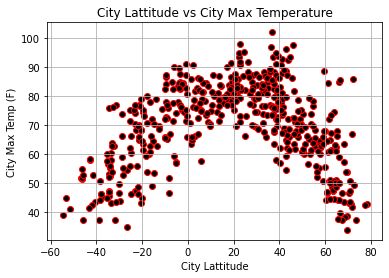

In [156]:
#Use matplotlib to plot data
plt.scatter(weather_data["Lat"],weather_data["Max Temp"],edgecolors="red",facecolors="black")
plt.title("City Lattitude vs City Max Temperature")
plt.xlabel("City Lattitude")
plt.ylabel("City Max Temp (F)")
plt.grid(b=True)
plt.show()

## Latitude vs. Humidity Plot

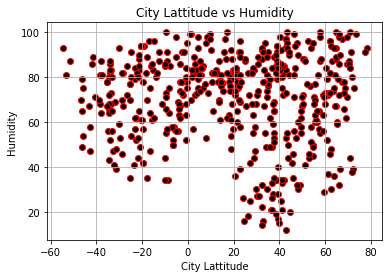

In [157]:
plt.scatter(weather_data["Lat"],weather_data["Humidity"],edgecolors="red",facecolors="black")
plt.title("City Lattitude vs Humidity")
plt.xlabel("City Lattitude")
plt.ylabel("Humidity")
plt.grid(b=True)
plt.show()

## Latitude vs. Cloudiness Plot

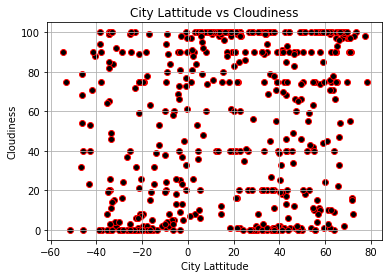

In [158]:
plt.scatter(weather_data["Lat"],weather_data["Cloudiness"],edgecolors="red",facecolors="black")
plt.title("City Lattitude vs Cloudiness")
plt.xlabel("City Lattitude")
plt.ylabel("Cloudiness")
plt.grid(b=True)
plt.show()

## Latitude vs. Wind Speed Plot

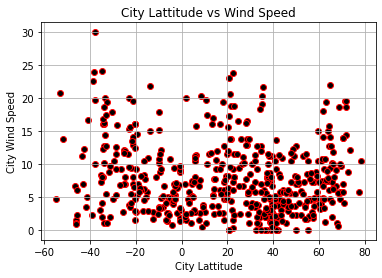

In [159]:
plt.scatter(weather_data["Lat"],weather_data["Wind Speed"],edgecolors="red",facecolors="black")
plt.title("City Lattitude vs Wind Speed")
plt.xlabel("City Lattitude")
plt.ylabel("City Wind Speed")
plt.grid(b=True)
plt.show()

## Linear Regression

In [160]:
northern_hemisphere = weather_data[weather_data["Lat"] >0]
northern_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,lagoa,39.0500,-27.9833,69.80,91,90,7.43,1627439623
2,bhimunipatnam,17.8833,83.4333,83.71,63,100,10.00,1627439830
4,saint george,37.1041,-113.5841,93.63,28,1,3.00,1627439830
8,zabol,32.2500,67.2500,83.32,22,100,7.25,1627439831
9,severo-kurilsk,50.6789,156.1250,59.94,88,100,6.98,1627439704
...,...,...,...,...,...,...,...,...
504,cedar city,37.6775,-113.0619,79.77,35,1,11.50,1627439921
505,margate,51.3813,1.3862,63.30,87,100,4.00,1627439700
507,krutikha,53.9599,81.2093,61.29,58,100,1.63,1627439946
508,eregli,37.5133,34.0467,63.36,51,0,7.07,1627439947


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39382671544060005


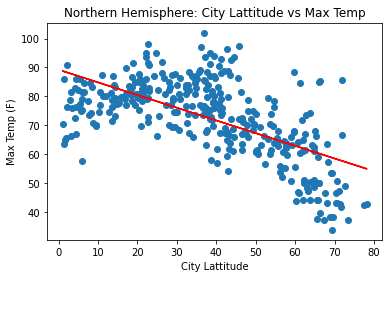

In [170]:
#import scipy to perform regression
from scipy.stats import linregress


# Add the linear regression equation and line to plot

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere: City Lattitude vs Max Temp")
plt.xlabel("City Lattitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [165]:
southern_hemisphere = weather_data[weather_data["Lat"] <0]
southern_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
1,ushuaia,-54.8000,-68.3000,38.86,93,90,4.61,1627439427
3,vaini,-21.2000,-175.2000,69.96,83,75,8.05,1627439618
5,avarua,-21.2078,-159.7750,77.05,65,21,6.91,1627439660
6,puerto ayora,-0.7393,-90.3518,71.38,84,20,8.84,1627439632
7,rikitea,-23.1203,-134.9692,74.21,79,100,15.30,1627439614
...,...,...,...,...,...,...,...,...
491,beloha,-25.1667,45.0500,62.01,77,0,11.70,1627439942
493,buenos aires,-34.6132,-58.3772,46.98,68,85,4.00,1627439688
500,victor harbor,-35.5667,138.6167,57.47,67,8,3.00,1627439945
506,port moresby,-9.4431,147.1797,87.22,66,75,11.50,1627439682


The r-squared is: 0.5230131597582889


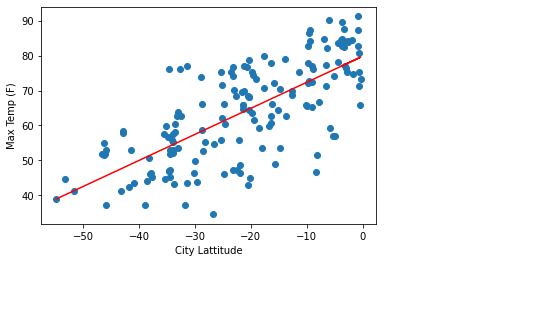

In [166]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere: City Lattitude vs Max Temp")
plt.xlabel("City Lattitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006548686511320048


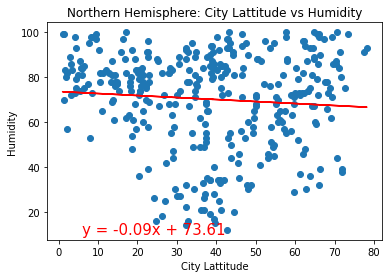

In [171]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere: City Lattitude vs Humidity")
plt.xlabel("City Lattitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.001304200598665861


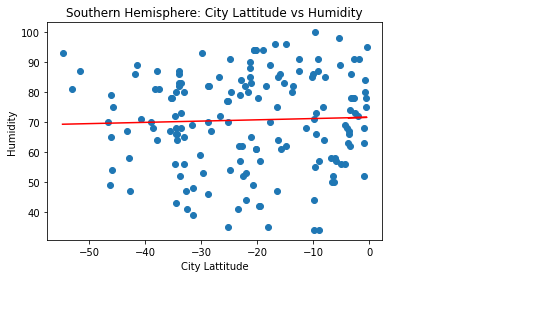

In [174]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere: City Lattitude vs Humidity")
plt.xlabel("City Lattitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.003113152871145588


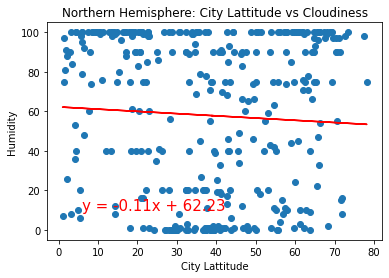

In [175]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere: City Lattitude vs Cloudiness")
plt.xlabel("City Lattitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0017372522096569172


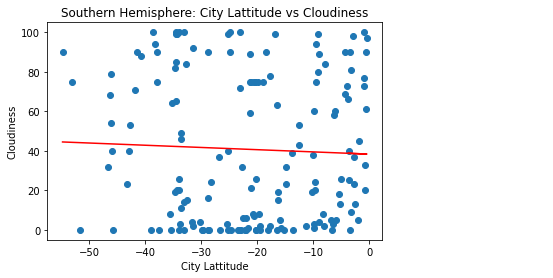

In [176]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere: City Lattitude vs Cloudiness")
plt.xlabel("City Lattitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00023317035573392915


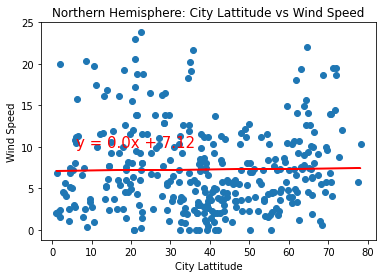

In [177]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere: City Lattitude vs Wind Speed")
plt.xlabel("City Lattitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09596184150393063


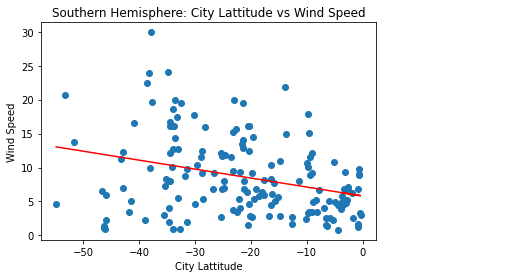

In [180]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere: City Lattitude vs Wind Speed")
plt.xlabel("City Lattitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()